## Part 4: Transfer Learning

In [1]:
# Importing libraries to build the model and plots
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import SGD, Adam
print('done')

done


In [2]:
# Importing dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images/255.0, test_images/255.0
print('done')

done


In [4]:
# Modifying hyperparameters
from tensorflow.keras.optimizers.schedules import PolynomialDecay, ExponentialDecay, InverseTimeDecay
filter_size = (3, 3)
pooling_size = (2, 2)
reg = None
num_epochs = 5
bs = 256
num_step = num_epochs*50000/bs
ac = 'relu'
learning_rate1 = ExponentialDecay(initial_learning_rate=0.1, decay_steps=num_step, decay_rate=0.8)
learning_rate2 = ExponentialDecay(initial_learning_rate=0.1, decay_steps=num_step, decay_rate=0.5)
adm=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print('done')

done


#### Load 'project_2_2.h5' as 'cifar1'

In [5]:
# Load best performed model in Part3
cifar1 = models.load_model('project_2_2.h5')

#### Train for another 10 epochs

In [6]:
history = cifar1.fit(train_images, train_labels, epochs=10, batch_size = 256, validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 48s 968us/sample - loss: 1.5124 - accuracy: 0.9557 - val_loss: 1.6243 - val_accuracy: 0.8416
Epoch 2/10
50000/50000 [==============================] - 41s 827us/sample - loss: 1.5110 - accuracy: 0.9565 - val_loss: 1.6290 - val_accuracy: 0.8362
Epoch 3/10
50000/50000 [==============================] - 41s 827us/sample - loss: 1.5113 - accuracy: 0.9562 - val_loss: 1.6298 - val_accuracy: 0.8337
Epoch 4/10
50000/50000 [==============================] - 42s 832us/sample - loss: 1.5092 - accuracy: 0.9579 - val_loss: 1.6306 - val_accuracy: 0.8349
Epoch 5/10
50000/50000 [==============================] - 41s 828us/sample - loss: 1.5100 - accuracy: 0.9572 - val_loss: 1.6299 - val_accuracy: 0.8354
Epoch 6/10
50000/50000 [==============================] - 41s 827us/sample - loss: 1.5085 - accuracy: 0.9586 - val_loss: 1.6307 - val_accuracy: 0.8355
Epoch 7/10
50000/50000 [====================

10000/1 - 4s - loss: 1.6205 - accuracy: 0.8080


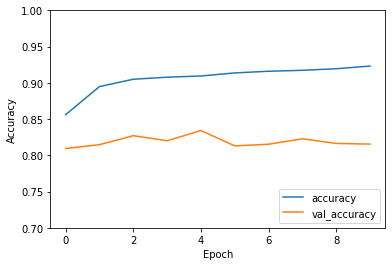

In [19]:
# Visualizing training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')

test_loss, test_accuracy = cifar1.evaluate(test_images, test_labels, verbose=2)

#### Disable all layers before classification layer

In [21]:
cifar2 = cifar1
for layer in cifar2.layers[:22]:
    layers.trainable = False
cifar2.compile(optimizer=adm, 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

#### Train for 10 epochs

In [23]:
history = cifar2.fit(train_images, train_labels, epochs=10, batch_size = 256, validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 42s 834us/sample - loss: 1.5403 - accuracy: 0.9237 - val_loss: 1.6450 - val_accuracy: 0.8170
Epoch 2/10
50000/50000 [==============================] - 41s 829us/sample - loss: 1.5349 - accuracy: 0.9288 - val_loss: 1.6502 - val_accuracy: 0.8109
Epoch 3/10
50000/50000 [==============================] - 41s 825us/sample - loss: 1.5335 - accuracy: 0.9306 - val_loss: 1.6363 - val_accuracy: 0.8265
Epoch 4/10
50000/50000 [==============================] - 41s 825us/sample - loss: 1.5303 - accuracy: 0.9334 - val_loss: 1.6256 - val_accuracy: 0.8350
Epoch 5/10
50000/50000 [==============================] - 41s 826us/sample - loss: 1.5296 - accuracy: 0.9334 - val_loss: 1.6241 - val_accuracy: 0.8388
Epoch 6/10
50000/50000 [==============================] - 41s 826us/sample - loss: 1.5289 - accuracy: 0.9345 - val_loss: 1.6224 - val_accuracy: 0.8387
Epoch 7/10
50000/50000 [====================

10000/1 - 4s - loss: 1.6604 - accuracy: 0.8058


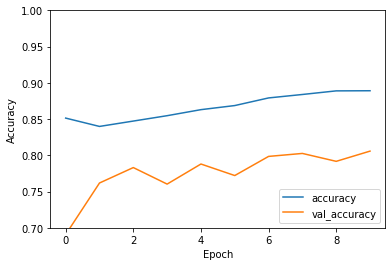

In [11]:
# Visualizing training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')

test_loss, test_accuracy = cifar2.evaluate(test_images, test_labels, verbose=2)

In [13]:
len(cifar2.layers)

23

#### Remove the original classification layer and add a new classification layer

In [15]:
cifar3 = models.Sequential()
for layer in cifar2.layers[:22]:
    cifar3.add(layer)
cifar3.add(layers.Dense(10, activation='softmax'))
cifar3.compile(optimizer=adm, 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])
cifar3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)       

#### Then train for 10 epochs

In [16]:
history = cifar3.fit(train_images, train_labels, epochs=10, batch_size = 256, validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 43s 866us/sample - loss: 1.6108 - accuracy: 0.8561 - val_loss: 1.6541 - val_accuracy: 0.8094
Epoch 2/10
50000/50000 [==============================] - 41s 824us/sample - loss: 1.5705 - accuracy: 0.8948 - val_loss: 1.6475 - val_accuracy: 0.8147
Epoch 3/10
50000/50000 [==============================] - 41s 825us/sample - loss: 1.5596 - accuracy: 0.9050 - val_loss: 1.6371 - val_accuracy: 0.8271
Epoch 4/10
50000/50000 [==============================] - 41s 825us/sample - loss: 1.5570 - accuracy: 0.9078 - val_loss: 1.6425 - val_accuracy: 0.8201
Epoch 5/10
50000/50000 [==============================] - 41s 825us/sample - loss: 1.5543 - accuracy: 0.9095 - val_loss: 1.6289 - val_accuracy: 0.8342
Epoch 6/10
50000/50000 [==============================] - 41s 825us/sample - loss: 1.5504 - accuracy: 0.9137 - val_loss: 1.6508 - val_accuracy: 0.8130
Epoch 7/10
50000/50000 [====================

10000/1 - 5s - loss: 1.6148 - accuracy: 0.8155


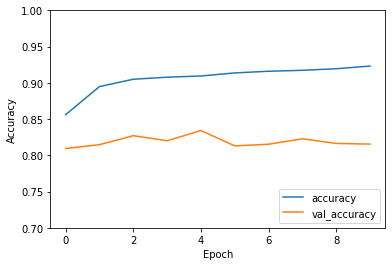

In [18]:
# Visualizing training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')

test_loss, test_accuracy = cifar3.evaluate(test_images, test_labels, verbose=2)

#### Comparing testing accuracy for the three models

|Model     |Test accuracy   |                      |   |   |
|----------|----------------|----------------------|---|---|
|Model 1   |0.8080          |                      |   |   |
|Model 2   |0.8058          |                      |   |   |
|Model 3   |0.8155          |                      |   |   |

We can see that the model with the best test accuracy is the last one.